<a href="https://colab.research.google.com/github/HEERHARISH1/ANO3_ML/blob/main/i222371_ANO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [64]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Automobile_data.csv")

# Replace "?" with NaN and drop missing values
df = df.replace("?", np.nan)
df = df.dropna()

# Define 9 selected features and ensure 'price' is included
selected_features = [
    'horsepower',
    'curb-weight',
    'engine-size',
    'highway-mpg',
    'length',
    'width',
    'height',
    'compression-ratio',
    'city-mpg'
]

# Ensure these columns and 'price' are numeric
df[selected_features + ['price']] = df[selected_features + ['price']].astype(float)

# Set features and target
X = df[selected_features]
y = df['price']


In [34]:
# Example: Fill numeric columns with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [35]:
df["num-of-doors"] = df["num-of-doors"].map({"two": 2, "four": 4})


In [36]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [8]:
df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [62]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays for gradient descent
X_train_np = X_train
y_train_np = y_train.to_numpy()
X_val_np = X_val
y_val_np = y_val.to_numpy()


In [37]:
def mean_squared_error_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [65]:
epochs = 1000
learning_rate = 0.01
batch_size = 32
n_features = X_train_np.shape[1]
weights = np.zeros(n_features)
bias = 0
train_loss_history = []
val_loss_history = []

# Early Stopping setup
patience = 10
best_val_loss = float('inf')
counter = 0

for epoch in range(epochs):
    permutation = np.random.permutation(X_train_np.shape[0])
    X_train_shuffled = X_train_np[permutation]
    y_train_shuffled = y_train_np[permutation]

    for i in range(0, X_train_np.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        y_pred = np.dot(X_batch, weights) + bias
        error = y_pred - y_batch

        dw = np.dot(X_batch.T, error) / len(X_batch)
        db = np.sum(error) / len(X_batch)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    # Compute train and validation loss
    train_predictions = np.dot(X_train_np, weights) + bias
    val_predictions = np.dot(X_val_np, weights) + bias
    train_loss = mean_squared_error(y_train_np, train_predictions)
    val_loss = mean_squared_error(y_val_np, val_predictions)

    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    # Early Stopping Condition
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break


Epoch 1: Train Loss = 155102917.4786, Val Loss = 119827054.3060
Epoch 2: Train Loss = 139495835.3340, Val Loss = 108825829.1351
Epoch 3: Train Loss = 126113680.8152, Val Loss = 99304312.2553
Epoch 4: Train Loss = 114573315.7239, Val Loss = 90996285.2765
Epoch 5: Train Loss = 104566840.9374, Val Loss = 83671917.1840
Epoch 6: Train Loss = 95746552.0456, Val Loss = 77147125.4334
Epoch 7: Train Loss = 87934330.9553, Val Loss = 71278534.2498
Epoch 8: Train Loss = 80977736.6544, Val Loss = 65967238.6985
Epoch 9: Train Loss = 74741579.2982, Val Loss = 61148883.8700
Epoch 10: Train Loss = 69134334.6821, Val Loss = 56754990.6478
Epoch 11: Train Loss = 64048261.2936, Val Loss = 52749043.8936
Epoch 12: Train Loss = 59432633.3718, Val Loss = 49070221.0394
Epoch 13: Train Loss = 55225804.3170, Val Loss = 45704997.1428
Epoch 14: Train Loss = 51402827.3774, Val Loss = 42587644.6826
Epoch 15: Train Loss = 47919700.0744, Val Loss = 39713086.2511
Epoch 16: Train Loss = 44717620.3117, Val Loss = 37070937

In [66]:
def batch_gradient_descent(X, y, X_val, y_val, lr=0.01, epochs=1000, reg_lambda=0.01, early_stopping_patience=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    best_val_loss = float('inf')
    patience_counter = 0

    history = {
        "train_loss": [],
        "val_loss": []
    }

    for epoch in range(epochs):
        y_pred = np.dot(X, weights) + bias
        error = y_pred - y

        dw = (2 / n_samples) * (np.dot(X.T, error) + reg_lambda * weights)
        db = (2 / n_samples) * np.sum(error)

        weights -= lr * dw
        bias -= lr * db

        train_loss = mean_squared_error_loss(y, np.dot(X, weights) + bias)
        val_loss = mean_squared_error_loss(y_val, np.dot(X_val, weights) + bias)

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return weights, bias, history


In [39]:
weights, bias, history = batch_gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=300, reg_lambda=0.1)


Epoch 1, Train Loss: 163830692.5132, Val Loss: 125950215.5426
Epoch 2, Train Loss: 154921405.4880, Val Loss: 119724233.2732
Epoch 3, Train Loss: 146736037.7291, Val Loss: 113979906.7646
Epoch 4, Train Loss: 139195341.4953, Val Loss: 108662539.3752
Epoch 5, Train Loss: 132230098.4485, Val Loss: 103724768.1842
Epoch 6, Train Loss: 125779783.5240, Val Loss: 99125542.8354
Epoch 7, Train Loss: 119791409.6571, Val Loss: 94829246.6363
Epoch 8, Train Loss: 114218528.7702, Val Loss: 90804940.2142
Epoch 9, Train Loss: 109020367.7728, Val Loss: 87025710.7452
Epoch 10, Train Loss: 104161081.2222, Val Loss: 83468112.1109
Epoch 11, Train Loss: 99609104.7895, Val Loss: 80111683.3585
Epoch 12, Train Loss: 95336595.8364, Val Loss: 76938534.5814
Epoch 13, Train Loss: 91318949.2715, Val Loss: 73932990.8386
Epoch 14, Train Loss: 87534378.4660, Val Loss: 71081286.0314
Epoch 15, Train Loss: 83963552.3995, Val Loss: 68371299.7690
Epoch 16, Train Loss: 80589281.4086, Val Loss: 65792331.2220
Epoch 17, Train Lo

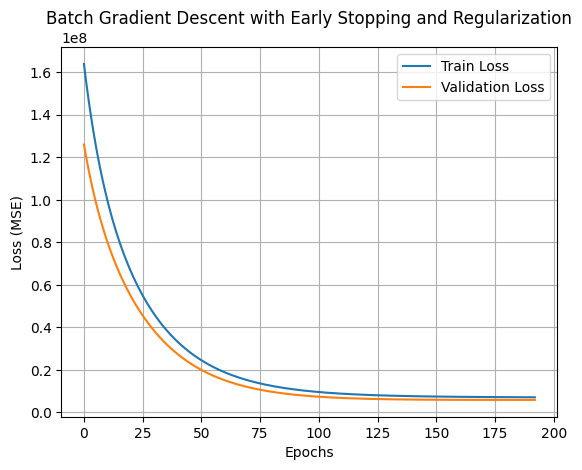

In [67]:
import matplotlib.pyplot as plt

plt.plot(history["train_loss"], label='Train Loss')
plt.plot(history["val_loss"], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Batch Gradient Descent with Early Stopping and Regularization")
plt.legend()
plt.grid(True)
plt.show()


In [68]:
def stochastic_gradient_descent(X, y, X_val, y_val, lr=0.01, epochs=100, reg_lambda=0.01, early_stopping_patience=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    best_val_loss = float('inf')
    patience_counter = 0

    history = {
        "train_loss": [],
        "val_loss": []
    }

    for epoch in range(epochs):
        for i in range(n_samples):
            # Access data using array indexing instead of .iloc
            xi = X[i].reshape(1, -1)
            # Access y using .iloc to handle potential index mismatches
            yi = y.iloc[i]

            y_pred = np.dot(xi, weights) + bias
            error = y_pred - yi

            dw = 2 * (np.dot(xi.T, error) + reg_lambda * weights)
            db = 2 * error

            weights -= lr * dw.flatten()
            bias -= lr * db.flatten()[0]

        train_pred = np.dot(X, weights) + bias
        val_pred = np.dot(X_val, weights) + bias

        train_loss = mean_squared_error_loss(y, train_pred)
        val_loss = mean_squared_error_loss(y_val, val_pred)

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return weights, bias, history

In [51]:
# SGD
w_sgd, b_sgd, hist_sgd = stochastic_gradient_descent(X_train, y_train, X_val, y_val)


Epoch 1, Train Loss: 8641385.6996, Val Loss: 5361061.6089
Epoch 2, Train Loss: 7830464.0737, Val Loss: 5626786.9521
Epoch 3, Train Loss: 7743088.7705, Val Loss: 5831876.3315
Epoch 4, Train Loss: 7700678.9267, Val Loss: 5899512.8487
Epoch 5, Train Loss: 7677420.4444, Val Loss: 5914025.4992
Epoch 6, Train Loss: 7663811.5355, Val Loss: 5906854.8890
Epoch 7, Train Loss: 7655504.2355, Val Loss: 5891968.6644
Epoch 8, Train Loss: 7650281.6639, Val Loss: 5875531.3934
Epoch 9, Train Loss: 7646920.8275, Val Loss: 5860093.1092
Epoch 10, Train Loss: 7644712.1689, Val Loss: 5846554.3529
Epoch 11, Train Loss: 7643230.7019, Val Loss: 5835086.1742
Early stopping at epoch 11


In [69]:
import numpy as np

def mini_batch_gradient_descent(X, y, X_val, y_val, lr=0.01, epochs=100, batch_size=32, reg_lambda=0.01, early_stopping_patience=10):
    """
    Performs mini-batch gradient descent.

    Args:
        X: Training data features.
        y: Training data target.
        X_val: Validation data features.
        y_val: Validation data target.
        lr: Learning rate.
        epochs: Number of epochs.
        batch_size: Batch size.
        reg_lambda: Regularization parameter.
        early_stopping_patience: Patience for early stopping.

    Returns:
        Tuple: (weights, bias, history)
            - weights: Learned weights.
            - bias: Learned bias.
            - history: Dictionary containing training and validation loss history.
    """

    X = X.values if isinstance(X, pd.DataFrame) else X  # Convert to NumPy array if needed
    y = y.values if isinstance(y, pd.Series) else y  # Convert to NumPy array if needed
    X_val = X_val.values if isinstance(X_val, pd.DataFrame) else X_val  # Convert to NumPy array if needed
    y_val = y_val.values if isinstance(y_val, pd.Series) else y_val  # Convert to NumPy array if needed


    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    best_val_loss = float('inf')
    patience_counter = 0

    history = {
        "train_loss": [],
        "val_loss": []
    }

    for epoch in range(epochs):
        # Shuffle data for each epoch
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Calculate predictions and error
            y_pred = np.dot(X_batch, weights) + bias
            error = y_pred - y_batch

            # Calculate gradients
            dw = (2 / batch_size) * (np.dot(X_batch.T, error) + reg_lambda * weights)
            db = (2 / batch_size) * np.sum(error)

            # Update weights and bias
            weights -= lr * dw
            bias -= lr * db

        # Calculate and store losses for the epoch
        train_loss = mean_squared_error_loss(y, np.dot(X, weights) + bias)
        val_loss = mean_squared_error_loss(y_val, np.dot(X_val, weights) + bias)

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

        print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

    return weights, bias, history

In [70]:

# Mini-Batch GD
w_mini, b_mini, hist_mini = mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size=32)


Epoch 1, Train Loss: 139534032.9039, Val Loss: 108819444.2904
Epoch 2, Train Loss: 114580075.7464, Val Loss: 90991999.1673
Epoch 3, Train Loss: 95715822.1513, Val Loss: 77148858.6104
Epoch 4, Train Loss: 80901226.5107, Val Loss: 66032917.2856
Epoch 5, Train Loss: 69019361.7919, Val Loss: 56871649.5922
Epoch 6, Train Loss: 59386177.8583, Val Loss: 49195582.9316
Epoch 7, Train Loss: 51412166.8911, Val Loss: 42707621.5678
Epoch 8, Train Loss: 44747858.1534, Val Loss: 37191340.6688
Epoch 9, Train Loss: 39130042.8642, Val Loss: 32524052.7097
Epoch 10, Train Loss: 34400277.9212, Val Loss: 28457514.2317
Epoch 11, Train Loss: 30374292.0477, Val Loss: 25037182.9255
Epoch 12, Train Loss: 26961517.1446, Val Loss: 22140593.8522
Epoch 13, Train Loss: 24063343.2611, Val Loss: 19614864.9972
Epoch 14, Train Loss: 21598246.0024, Val Loss: 17473387.5824
Epoch 15, Train Loss: 19492408.0843, Val Loss: 15646258.8852
Epoch 16, Train Loss: 17694667.8968, Val Loss: 14107437.2820
Epoch 17, Train Loss: 16162378

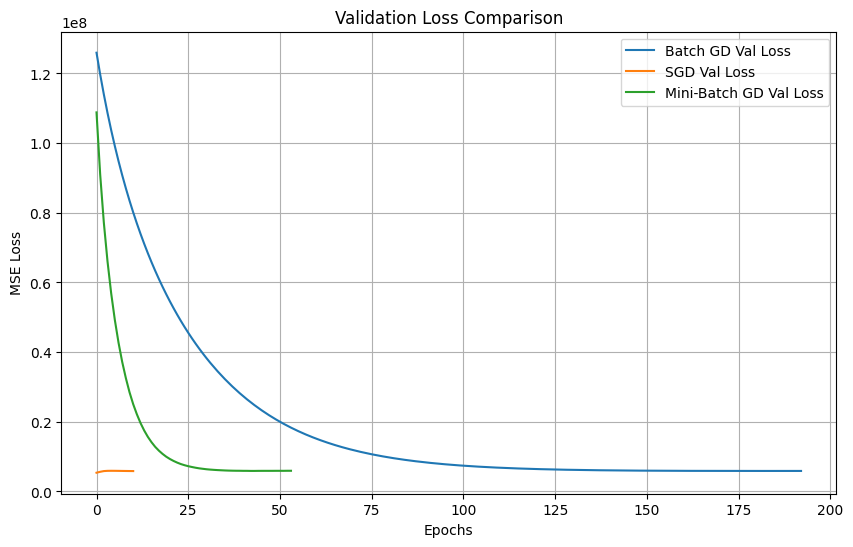

In [71]:
def plot_loss(histories, labels):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history["val_loss"], label=f'{label} Val Loss')
    plt.title("Validation Loss Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss([history, hist_sgd, hist_mini], ['Batch GD', 'SGD', 'Mini-Batch GD'])


In [72]:
from sklearn.model_selection import train_test_split

selected_features = [
    "engine-size", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "curb-weight", "compression-ratio", "bore", "stroke"
]
X = df[selected_features]

y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Recreate and refit the pipeline using updated feature set
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Make sure X_train and X_test are both derived from the same selected_features
pipeline.fit(X_train, y_train)  # X_train should have 9 features

# Predict using the updated pipeline
y_pred = pipeline.predict(X_test)  # X_test must also have 9 features

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 5245679.285371969
R2 Score: 0.705209983486384


In [75]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

y_pred_poly = model_poly.predict(X_test)
print("Poly MSE:", mean_squared_error(y_test, y_pred_poly))


Poly MSE: 9774704.655810304


In [76]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])


In [102]:
selected_features = [
    "engine-size", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "curb-weight", "compression-ratio", "bore", "stroke"
]

X = df[selected_features]
y = df["price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rebuild and fit pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", SGDRegressor(max_iter=1000, tol=1e-3))
])

pipeline.fit(X_train, y_train)

# Save only this pipeline
joblib.dump(pipeline, "sgd_pipeline_model.pkl")


['sgd_pipeline_model.pkl']

In [79]:
pip install huggingface_hub


In [103]:
from huggingface_hub import HfApi, HfFolder, Repository, upload_file

# Login (run this once manually in Colab)
from huggingface_hub import login
login()  # Enter your token from https://huggingface.co/settings/tokens


In [104]:
from huggingface_hub import create_repo
create_repo("heerheer/Car_ML")

HfHubHTTPError: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-67f94941-0d03f2d6318bfa2e5ac43a9c;116c4edc-1065-4d80-be2a-c735bfa07574)

You already created this model repo

In [105]:
upload_file(
    path_or_fileobj="sgd_pipeline_model.pkl",
    path_in_repo="sgd_pipeline_model.pkl",
    repo_id="heerheer/Car_ML",  # Create this repo manually first on huggingface.co
    repo_type="model"
)


sgd_pipeline_model.pkl:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/heerheer/Car_ML/commit/eff6dc0eb4bc43e6ed127481c1a3dac4f4200dc3', commit_message='Upload sgd_pipeline_model.pkl with huggingface_hub', commit_description='', oid='eff6dc0eb4bc43e6ed127481c1a3dac4f4200dc3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/heerheer/Car_ML', endpoint='https://huggingface.co', repo_type='model', repo_id='heerheer/Car_ML'), pr_revision=None, pr_num=None)

In [106]:
import joblib
import numpy as np

# Load the model
model = joblib.load('sgd_pipeline_model.pkl')

def predict(input_array):
    input_scaled = model['scaler'].transform([input_array])
    prediction = np.dot(input_scaled, model['weights']) + model['bias']
    return prediction[0]


In [90]:
pip install wandb


In [107]:
import wandb
from sklearn.metrics import mean_squared_error, r2_score

wandb.init(project="ml-regression-model")

# After training and prediction
wandb.log({
    "mse": mean_squared_error(y_test, y_pred),
    "r2_score": r2_score(y_test, y_pred)
})


mse,▁
r2_score,▁
mse,48593340.79845
r2_score,-0.08914


In [108]:
from huggingface_hub import hf_hub_download
import joblib

# Download model from Hugging Face Hub
model_path = hf_hub_download(repo_id="heerheer/Car_ML", filename="sgd_pipeline_model.pkl")

# Load the model
model = joblib.load(model_path)


sgd_pipeline_model.pkl:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

In [85]:
!pip install flask flask-ngrok pyngrok


In [86]:
!pip install flask-ngrok
!pip install pyngrok


In [87]:
!pip install pyngrok flask


In [99]:
from pyngrok import conf

conf.get_default().auth_token = "2vaChpTGv5STGgn0md75nXmhtew_4NNM6jfSC3JQGR3zWhYqm"


In [111]:
from flask import Flask, request, render_template_string
from pyngrok import ngrok
import joblib
from huggingface_hub import hf_hub_download
import joblib

# Download model from Hugging Face Hub
model_path = hf_hub_download(repo_id="heerheer/Car_ML", filename="sgd_pipeline_model.pkl")

# Load the model
model = joblib.load(model_path)


# Define the expected input features
FEATURE_NAMES = [
    "engine-size",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "curb-weight",
    "compression-ratio",
    "bore",
    "stroke"
]

app = Flask(__name__)

# HTML template
template = '''
<!DOCTYPE html>
<html>
<head>
    <title>Car Price Prediction</title>
    <style>
        body { font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #f4f6f8; padding: 40px; }
        .container { max-width: 800px; margin: auto; background: white; padding: 30px; border-radius: 8px; box-shadow: 0 0 10px rgba(0,0,0,0.1); }
        h2 { color: #2c3e50; text-align: center; }
        form { display: flex; flex-wrap: wrap; justify-content: space-between; }
        .form-group { width: 48%; margin-bottom: 15px; }
        label { display: block; margin-bottom: 5px; font-weight: bold; }
        input[type="text"] { width: 100%; padding: 8px; border: 1px solid #ccc; border-radius: 4px; }
        input[type="submit"] { margin-top: 20px; width: 100%; padding: 12px; background-color: #3498db; color: white; border: none; border-radius: 5px; font-size: 16px; cursor: pointer; }
        input[type="submit"]:hover { background-color: #2980b9; }
        .result { text-align: center; margin-top: 20px; font-size: 20px; color: #27ae60; }
    </style>
</head>
<body>
    <div class="container">
        <h2>Car Price Predictor</h2>
        <form method="post">
            {% for feature in features %}
                <div class="form-group">
                    <label>{{ feature.replace('-', ' ').title() }}</label>
                    <input type="text" name="{{ feature }}" required>
                </div>
            {% endfor %}
            <input type="submit" value="Predict Price">
        </form>
        {% if prediction is not none %}
            <div class="result">Estimated Price: ${{ prediction }}</div>
        {% endif %}
    </div>
</body>
</html>
'''

@app.route("/", methods=["GET", "POST"])
def predict():
    prediction = None
    if request.method == "POST":
        try:
            # Read values directly in correct order
            inputs = [float(request.form[feature]) for feature in FEATURE_NAMES]

            # Predict using the full pipeline
            prediction = round(model.predict([inputs])[0], 2)

        except Exception as e:
            prediction = f"Error: {e}"

    return render_template_string(template, prediction=prediction, features=FEATURE_NAMES)

# Start server
public_url = ngrok.connect(5000)
print("🚗 Visit your app at:", public_url)
app.run(port=5000)


🚗 Visit your app at: NgrokTunnel: "https://d672-34-106-137-246.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [11/Apr/2025 17:12:39] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Apr/2025 17:12:40] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [11/Apr/2025 17:12:59] "POST / HTTP/1.1" 200 -


In [ ]:
python app.py


SyntaxError: invalid syntax (<ipython-input-87-b851947b46d7>, line 1)